In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
Categories=['10','20','50','100','200','500','2000']
flat_data_arr=[]                                                         #input array
target_arr=[]                                                            #output array
datadir='C:/Users/divya/Desktop/SVM/training' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)                                               #dataframe
df['Target']=target
x=df.iloc[:,:-1]                                                         #input data 
y=df.iloc[:,-1]                                                          #output data

loading... category : 10
loaded category:10 successfully
loading... category : 20
loaded category:20 successfully
loading... category : 50
loaded category:50 successfully
loading... category : 100
loaded category:100 successfully
loading... category : 200
loaded category:200 successfully
loading... category : 500
loaded category:500 successfully
loading... category : 2000
loaded category:2000 successfully


In [3]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


In [5]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 65.71428571428571% accurate


In [6]:
from sklearn.metrics import classification_report
pred = model.predict(x_train)

In [7]:
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        19

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [8]:
from sklearn.metrics import classification_report
pred = model.predict(x_test)


In [9]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.50      0.40      0.44         5
           2       0.80      0.80      0.80         5
           3       0.57      0.67      0.62         6
           4       1.00      0.25      0.40         4
           5       0.43      0.60      0.50         5
           6       1.00      1.00      1.00         5

    accuracy                           0.66        35
   macro avg       0.71      0.65      0.64        35
weighted avg       0.70      0.66      0.65        35



Enter URL of Image :C:/Users/nikhi/Desktop/svm_dataset/training/20/20_1.jpg


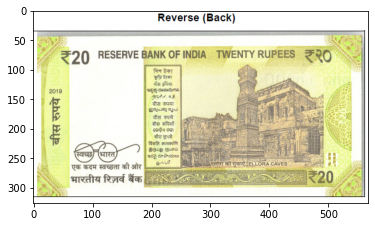

10 = 12.182335530021552%
20 = 43.485841986707584%
50 = 3.4155565868167828%
100 = 1.2714270634907618%
200 = 31.94774520805589%
500 = 3.736302704233492%
2000 = 3.960790920673941%
The predicted image is : 20


In [10]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])